# KIWI PROJECT

In [187]:
import numpy as np
import scipy.ndimage as ndimage
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets

---

In [37]:
def info(im, name='Kiwi'):
    print(f'{name}:  max={im.max():.2f}, mean={im.mean():.2f}, min={im.min():.2f}, shape={im.shape}')

In [235]:
def show_crossection(im, sl=64, dir=0, type='S', title='KIWI', figsize=(10,10)):
    cmap = plt.gray()
    interp = 'nearest'
    orig ='lower'
    axis = 'on'
    
    fig, ax = plt.subplots(figsize=figsize)
    if type == 'S' :  
        if dir==2:
            ax.imshow(im[:,:,sl], cmap=cmap, interpolation=interp, origin=orig)
        if dir==1:
            ax.imshow(im[:,sl,:], cmap=cmap, interpolation=interp, origin=orig)
        if dir==0:
            ax.imshow(im[sl,:,:], cmap=cmap, interpolation=interp, origin=orig)
    elif type=='M':
        ax.imshow(im.max(dir), cmap=cmap, interpolation=interp, origin=orig)
    elif type=='m':
        ax.imshow(im.min(dir), cmap=cmap, interpolation=interp, origin=orig)    
    ax.set_title(title, fontsize=18, weight='bold')    
    ax.axis(axis)
    plt.show()    

In [236]:
def show_all_crossections(im, sl=[], type='S', titles=['Coronal', 'Sagital', 'Axial'], title='KIWI', figsize=(18,7)):
    cmap=plt.gray()
    interp='nearest'
    orig='lower'
    axis = bool(1)
    asp = 'equal'
    
    if len(sl)<3:
        sl=np.asarray((np.array(im.shape)//2), np.uint)
        
    f,ax = plt.subplots(1,3,figsize=figsize)
    axs = ax.flat[:]
    
    _ =[a.set_title(t, fontsize=18) for t, a in zip(titles, axs)]
    _ =[a.axis(axis) for a in axs]
    _ =[a.axes.axes.set_aspect(asp) for a in axs]
    
    if type=='M':
        _ = [a.imshow(im.max(d), cmap=cmap, interpolation=interp, origin=orig) for d, a in zip(range(3), axs)]
    if type=='m':
        _ = [a.imshow(im.min(d), cmap=cmap, interpolation=interp, origin=orig) for d, a in zip(range(3), axs)]
    if type=='S':
        _ = axs[0].imshow(im[sl[0],:,:],cmap=cmap, interpolation=interp, origin=orig)
        _ = axs[1].imshow(im[:,sl[1],:],cmap=cmap, interpolation=interp, origin=orig)
        _ = axs[2].imshow(im[:,:,sl[2]],cmap=cmap, interpolation=interp, origin=orig)   
    plt.suptitle(title, fontsize=22, weight='bold')
    plt.tight_layout()
    plt.show()    

<Figure size 432x288 with 0 Axes>

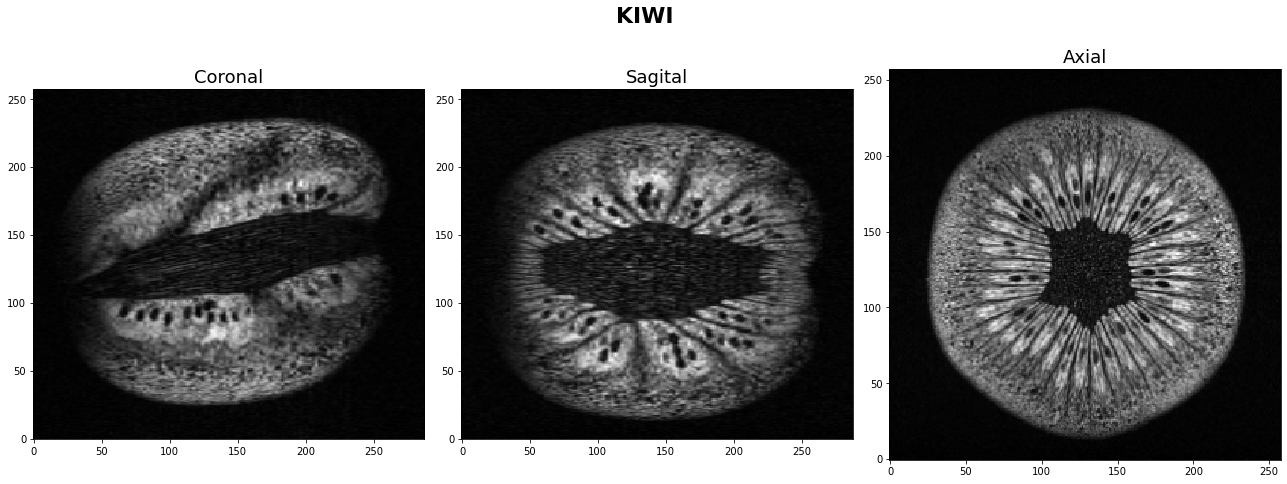

In [237]:
show_all_crossections(ki, type='S')

<Figure size 432x288 with 0 Axes>

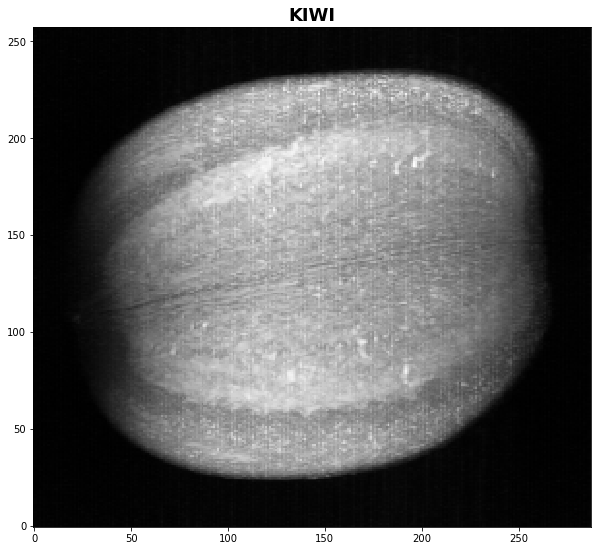

In [238]:
show_crossection(ki,sl=64, dir=0, type='M')

---

In [3]:
ko_name = 'KO.nii.gz'
ki_name = 'KI.nii.gz'

In [25]:
ko = nib.load(ko_name).get_fdata()
ki = nib.load(ki_name).get_fdata()

kiwis = [['Origin.', ko], ['Interp.', ki]]

In [39]:
_= [info(k,n) for n,k in kiwis]

Origin.:  max=32766.00, mean=3374.98, min=71.00, shape=(256, 256, 128)
Interp.:  max=30765.67, mean=3374.91, min=71.00, shape=(258, 258, 288)


In [202]:
info(ki)

Kiwi:  max=30765.67, mean=3374.91, min=71.00, shape=(258, 258, 288)


[129 129 144]


<Figure size 432x288 with 0 Axes>

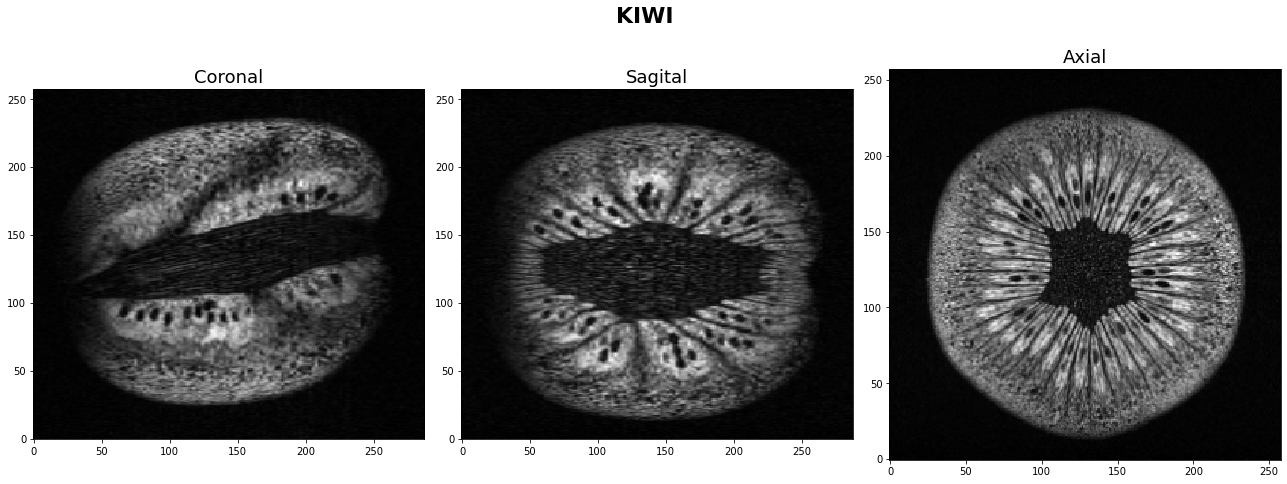

In [203]:
show_all_crossections(ki, type='S')

In [240]:
ki_med20 = ndimage.medki_med20ilter(ki, size=20)

<Figure size 432x288 with 0 Axes>

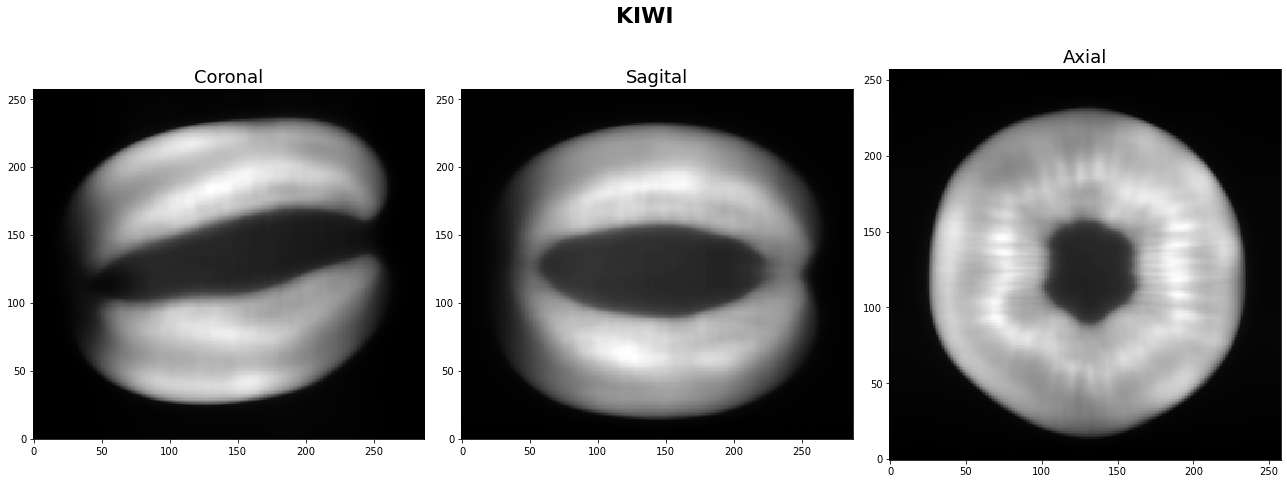

In [241]:
show_all_crossections(ki_med20, type='S')

In [242]:
info(ki_med20)

Kiwi:  max=15946.64, mean=3213.66, min=364.19, shape=(258, 258, 288)


In [243]:
np.save('kiwi_median_20.npy', ki_med20)

In [297]:
th = np.where(ki_med20 >= 4500, 1, 0)

In [298]:
info(th)

Kiwi:  max=1.00, mean=0.28, min=0.00, shape=(258, 258, 288)


<Figure size 432x288 with 0 Axes>

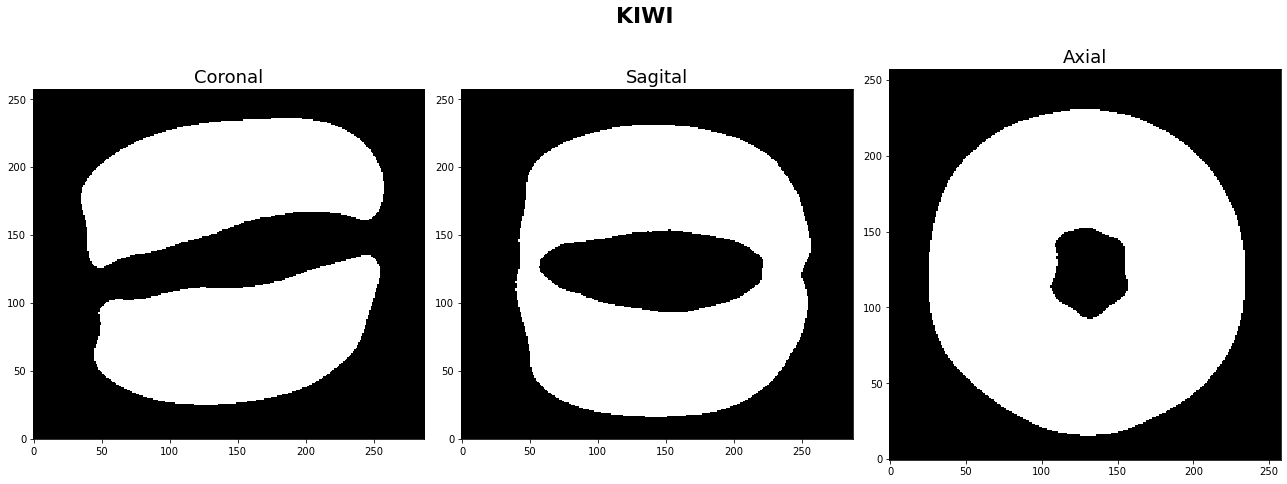

In [296]:
show_all_crossections(th, type='S')